In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('TelcoChurn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

## Dropping ID feature

In [5]:
df.drop(['customerID'], axis = 1, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Splitting independent and dependent features

In [7]:
X = df.drop(['Churn'], axis = 1)
Y = df[['Churn']]

In [8]:
num = X.select_dtypes(include = 'number')
char = X.select_dtypes(include = 'object')

In [9]:
num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [10]:
num['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [11]:
char.insert(0,'SeniorCitizen',num['SeniorCitizen'])

In [12]:
del num['SeniorCitizen']

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = pd.DataFrame(le.fit_transform(Y), columns = ['Churn'])

In [17]:
Y.mean()

Churn    0.26537
dtype: float64

In [18]:
num.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


## Outlier Detection

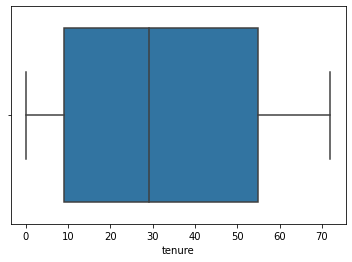

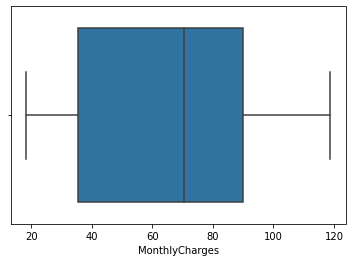

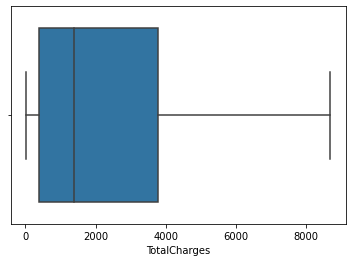

In [23]:
for column in num.columns:
    plt.figure()
    sns.boxplot(num[column])

## Bi-variate Analysis

In [19]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, strategy='quantile', encode='ordinal')
num_binned = pd.DataFrame(kbins.fit_transform(num), columns = num.columns)

In [20]:
num_binned_Y = pd.concat([num_binned,Y], axis = 1)

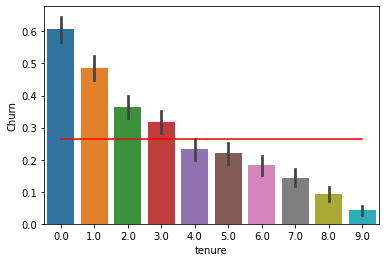

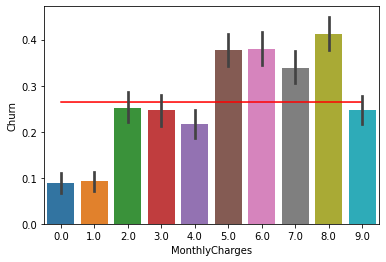

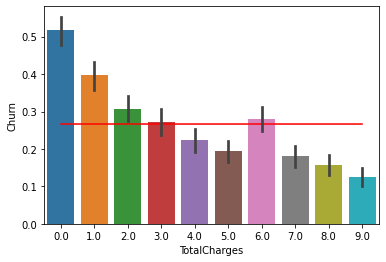

In [22]:
for column in num_binned.columns:
    plt.figure()
    sns.lineplot(x = column, y = Y['Churn'].mean(), data = num_binned_Y, color = 'red')
    sns.barplot(x = column, y = "Churn", data = num_binned_Y)

In [24]:
char_Y = pd.concat([char,Y], axis = 1)

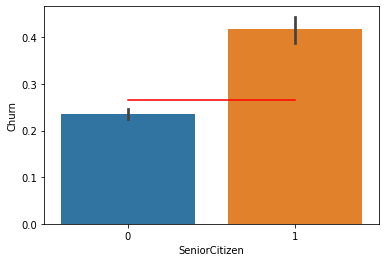

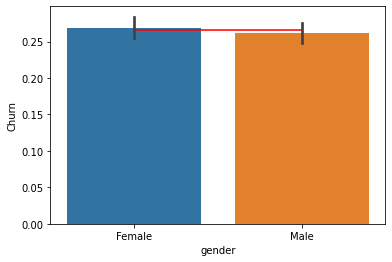

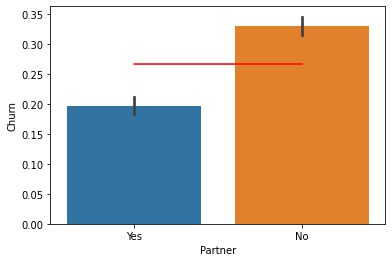

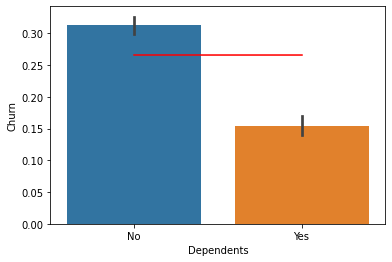

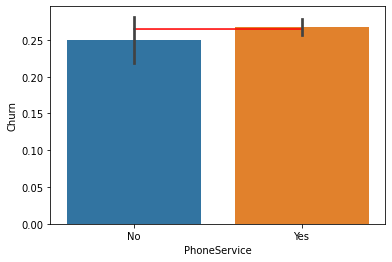

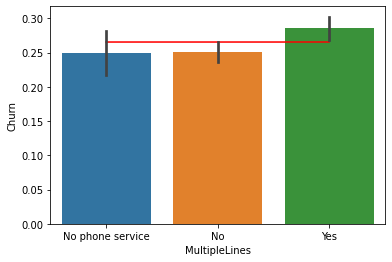

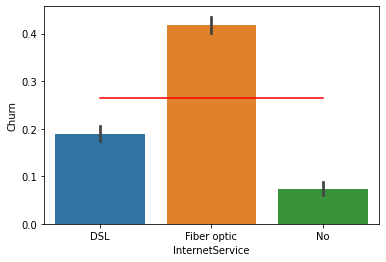

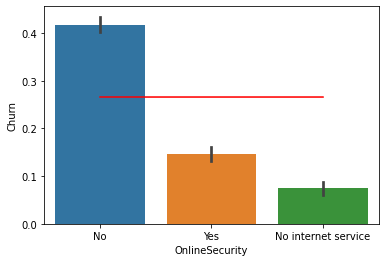

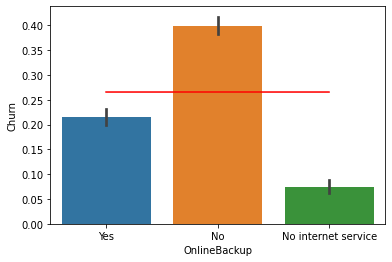

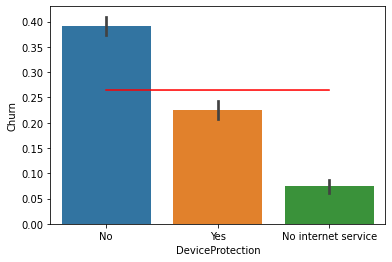

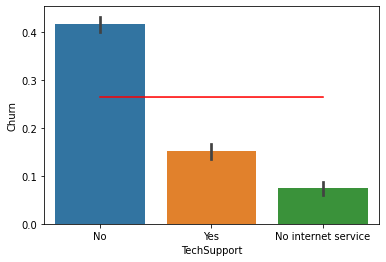

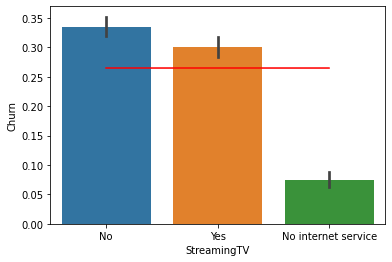

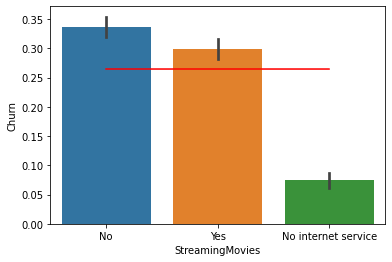

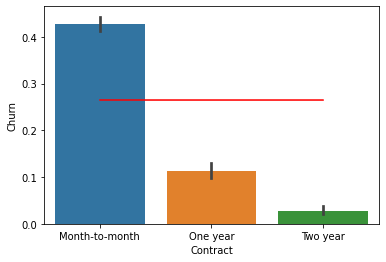

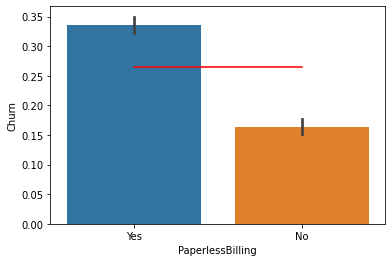

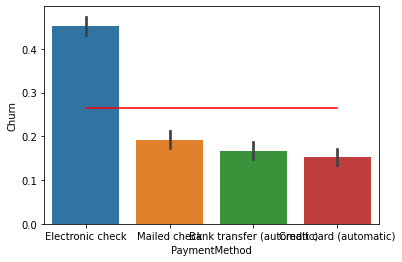

In [25]:
for column in char.columns:
    plt.figure()
    sns.lineplot(x = column, y = Y['Churn'].mean(), data = char_Y, color = 'red')
    sns.barplot(x = column, y = "Churn", data = char_Y)

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in char.columns:
    char[col] = pd.DataFrame(le.fit_transform(char[col]), columns = [col])
    
for col in char_best.columns:
    char_best[col] = pd.DataFrame(le.fit_transform(char_best[col]), columns = [col])

In [34]:
X_all = pd.concat([num,char], axis = 1)
char_best = char[['SeniorCitizen','Partner','Dependents','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]
X_best = pd.concat([num,char_best], axis = 1)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X_all), columns = X_all.columns)
X_best_std = pd.DataFrame(sc.fit_transform(X_best), columns = X_best.columns)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y , test_size=0.3, random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_pred = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))
print(recall_score(Y_test,Y_pred))
print(roc_auc_score(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

0.8102224325603408
0.6798336798336798
0.5696864111498258
0.7348107169459329
[[1385  154]
 [ 247  327]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.75      2113
weighted avg       0.80      0.81      0.80      2113



In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train,Y_train)
Y_pred_rfc = rfc.predict(X_test)
print(accuracy_score(Y_test,Y_pred_rfc))
print(precision_score(Y_test,Y_pred_rfc))
print(recall_score(Y_test,Y_pred_rfc))
print(roc_auc_score(Y_test,Y_pred_rfc))
print(confusion_matrix(Y_test,Y_pred_rfc))
print(classification_report(Y_test,Y_pred_rfc))

0.7875059157595835
0.6590330788804071
0.45121951219512196
0.6820749932645526
[[1405  134]
 [ 315  259]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.66      0.45      0.54       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113



In [48]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,Y_train)
Y_pred_svc = svc.predict(X_test)
print(accuracy_score(Y_test,Y_pred_svc))
print(precision_score(Y_test,Y_pred_svc))
print(recall_score(Y_test,Y_pred_svc))
print(roc_auc_score(Y_test,Y_pred_svc))
print(confusion_matrix(Y_test,Y_pred_svc))
print(classification_report(Y_test,Y_pred_svc))

0.804070042593469
0.6687763713080169
0.5522648083623694
0.7251252566828091
[[1382  157]
 [ 257  317]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.67      0.55      0.60       574

    accuracy                           0.80      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.80      0.80      2113



In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)
print(accuracy_score(Y_test,Y_pred_knn))
print(precision_score(Y_test,Y_pred_knn))
print(recall_score(Y_test,Y_pred_knn))
print(roc_auc_score(Y_test,Y_pred_knn))
print(confusion_matrix(Y_test,Y_pred_knn))
print(classification_report(Y_test,Y_pred_knn))

0.7638428774254614
0.5703564727954972
0.5296167247386759
0.6904094020054654
[[1310  229]
 [ 270  304]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1539
           1       0.57      0.53      0.55       574

    accuracy                           0.76      2113
   macro avg       0.70      0.69      0.69      2113
weighted avg       0.76      0.76      0.76      2113



In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
Y_pred_gbc = gbc.predict(X_test)
print(accuracy_score(Y_test,Y_pred_gbc))
print(precision_score(Y_test,Y_pred_gbc))
print(recall_score(Y_test,Y_pred_gbc))
print(roc_auc_score(Y_test,Y_pred_gbc))
print(confusion_matrix(Y_test,Y_pred_gbc))
print(classification_report(Y_test,Y_pred_gbc))

0.8021769995267393
0.6764705882352942
0.5209059233449478
0.7139942222312783
[[1396  143]
 [ 275  299]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.68      0.52      0.59       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [51]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train,Y_train)
Y_pred_xgb = xgb.predict(X_test)
print(accuracy_score(Y_test,Y_pred_xgb))
print(precision_score(Y_test,Y_pred_xgb))
print(recall_score(Y_test,Y_pred_xgb))
print(roc_auc_score(Y_test,Y_pred_xgb))
print(confusion_matrix(Y_test,Y_pred_xgb))
print(classification_report(Y_test,Y_pred_xgb))

[17:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.791292001893043
0.6501128668171557
0.5017421602787456
0.7005137052205943
[[1384  155]
 [ 286  288]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1539
           1       0.65      0.50      0.57       574

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

